<center>
    <span style="color:blue; font-family:Georgia;  font-size:2em;"><h1>
        Solving Linear Regression Problems with Stochastic Gradient Descent</h1></span>
 </center>
        <p> </p>
        <p> </p>
        <center><span style="color:blue; font-family:Georgia;  font-size:1em;">
        Ramon Béjar</span></center>
        <canvas id="myCanvas" width="200" height="100" style="border:0px solid"></canvas>
        <center>Data mining - Master on Computer Science</center>
        <center><img src="M-UdL2.png"  width="200" alt="UdL Logo"></center>

In this notebook we discuss the problem of solving linear regression problems with fast optimization methods that however are, in general, approximate: they give solutions  close to the optimal one, in general, but not always equal to.

In a linear regression problem, we are given a series of $m$ n-dimensional points (represented as a $m \times n$ matrix X) and a corresponding $m$-dimensional column vector $Y$, where each value $Y_i$ in $Y$ corresponds to the target value associated with point $X_i$ (row i of matrix X).


A linear model for fitting $X$ with $Y$ is a linear equation with $n$ parameters $\beta^j$ of this kind:

$$ \hat{Y_i} = \sum_{j=1}^{n} \beta^j X_i^j $$

where $  \hat{Y_i} $ stands for the predicted value for $Y_i$, that could be not equal to the *real* value $Y_i$ if our linear model does not fit perfectly. Of course, it may be the case that there is no linear model that fits with our data perfectly.

Using matrix notation, we can express the set of $m$ predicted values as a column vector of $m$ values as follows:
$$   \begin{pmatrix}
      X_1^1 X_1^2 \ldots X_1^n \\
        \vdots        \vdots \vdots \\     
       X_m^1 X_m^2 \ldots X_m^n
    \end{pmatrix}  \times 
     \begin{pmatrix}
      \beta^1 \\
       \vdots \\
       \beta^n
     \end{pmatrix} =   \begin{pmatrix}
      \hat{Y_1} \\
       \vdots \\
       \hat{Y_m}
     \end{pmatrix}
$$
So, the predicted value $ \hat{Y_i} $ is the result of multiplying the row $X_i$ by the column vector $\beta$:
$$
 \hat{Y_i}  =  X_i \beta
$$

The goal is to find an optimal solution for this problem, where the usual function to measure the quality of a solution is the Mean Square Error (MSE):

$$ \frac{\sum_{i=1}^m ( \hat{Y_i} - Y_i )^2}{2 m} =  \frac{\sum_{i=1}^m (X_i \beta - Y_i )^2}{2 m}  $$

Obviously, if there exists a linear model (given by the values in $\beta$) to fit X with Y then its MSE will be 0. If there is no a pure linear model, we still would like to find one with the smallest MSE.

In principle, the best possible linear problem can be found exactly by solving the closed form solution of the minimization problem:

$$ \hat{\beta} = \underset{\beta}{\operatorname{\arg\min}} \| X \beta -Y \|_{2} =  \underset{\beta}{\operatorname{\arg\min}} \sum_{i=1}^m (  Y_i - X_i \beta  )^2 $$

The closed form solution for the above problem is obtained after solving the equation that expresses that the derivative of the error function is equal to zero (with respect to the parameters in $\beta$):
$$ -2X^T (Y - X\beta) = 0  $$
so:
$$ - X^T X\beta =  X^T Y  $$



and its final solution, in matrix notation, is given by:

$$ \hat{\beta}=(X^{T}X)^{-1}X^{T}Y $$

But the problem is that the time complexity to solve such matrix equation is $ O(n^3+(n^2)m) $.

So, it is clear that such computation is infeasible if we are dealing with big data sets (big m) with many features per point (big n). Instead, we can try to find an **approximation** for $ \hat{\beta} \ \ $ using an approximation algorithm that tries to find a solution with a good MSE.

The approximation method we pick is the Stochastic Gradient Descend (SGD) algorithm, that is also the base of different algorithms for learning (deep) neural network problems. 
The nice property is that for this problem the error function is convex and we know that the basic gradient descent algorithm will converge, with enough time, to the optimal solution if we pick an *small enough* value for a crucial parameter: the learning rate. For the stochastic variant (SGD), convergence may be slower. 


## Stochastic Gradient Descend algorithm for linear regression

To understand how SGD is used to find a linear model from $X$ and $Y$, we first need to fix the error function that it uses to measure the error obtained with a particular linear model $\beta$. We pick our previous square error function:

$$ Error(\beta,X,Y) = \frac{1}{2m} \sum_{i=1}^m (X_i \beta - Y_i )^2 $$

that is, the mean square error. In SGD, we try to find a good model $\beta$ by starting with an arbitrary model $\beta_0$, and then in successive iterations modify the $n$ parameters of $\beta$ in such a way that the error function descends a little bit in every iteration. 




For finding how to modify each parameter $\beta^j$, SGD uses the partial derivative function of the error function with respect to each parameter $\beta^j$:

$$ \frac{\partial Error(\beta,X,Y)}{\partial \beta^j} = \frac{1}{m}\sum_{i=1}^m (X_i \beta - Y_i ) X_{i,j} $$

This partial derivative function indicates us how much the error increases if we increase a little bit the parameter $\beta^j$. So, if we modify $\beta^j$ in the **opposite direction of this partial derivative**, we will decrease the error.

Actually, SGD uses a learning parameter $\alpha$ to modify a little bit the amount of change produced in every iteration. That is, it modifies the  value of $\beta^j$ at the current iteration $t$ (call it $\beta^j(t)$) in this way:

$$ \beta^j(t+1) = \beta^j(t) - \alpha \frac{\partial Error(\beta(t),X,Y)}{\partial \beta^j}  $$

## Gradient Descend Simple Example (one parameter)



In [13]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import math

Square error function for a fixed sample point $(x_0,y_0) $ and linear model $y=\beta^1 x$:
$$ Error(\theta,(x_0,y_0) ) = \frac{1}{2} (\beta^1 x_0 - y_0 )^2 $$

Partial derivative with respect to $\beta^1$ parameter:
$$ \frac{\partial  Error(\beta,(x_0,y_0) )}{\partial \beta^1} =  (\beta^1 x_0 - y_0 )x_0 $$

In [14]:
# Define Square error function for a given beta^1 value and fixed point
def SError(beta,point):
      return 0.5* math.pow( beta*point[0]-point[1] ,2.0)
    
# Define gradient (derivative) with respect to beta^1    
def gradient(beta,point):
    return ( ( beta*point[0]-point[1] )* point[0] )

Let's now study the error function with respect to the $\beta^1$ parameter (the point will be fixed), for the range of values $\beta^1 \in [-6,9]$ and the fixed point $(2,3)$

In [15]:
x = np.linspace(-6, 9, 50)

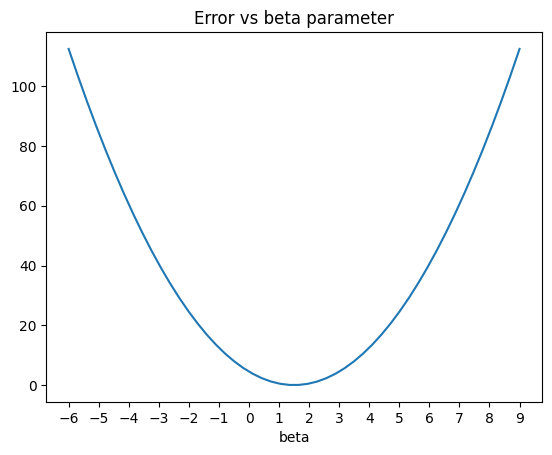

In [16]:
fig = plt.figure()
plt.title("Error vs beta parameter")
plt.xlabel("beta")
plt.xticks(np.arange(min(x), max(x)+1.0, 1.0))
y = []
plt.plot(x, [SError(v,(2.0,3.0)) for v in x]  , '-')

To visualize how the gradient indicates the speed of increase of error, let's compute the tangent line to a fixed value for $\beta^1=\beta_i$. We know that such line equation should satisfy:
$$ Error(\beta_i,(x_0,y_0)  ) = p \beta_i + c  $$
with $ p = gradient(\beta_i,point) $

So, the constant term for the tangent line is:
$$ c =  Error(\beta_i,(x_0,y_0)  )  - p \beta_i $$

In [17]:
def tangentLine(betai,point,beta):
    p = gradient(betai,point)
    c =  SError(betai,point) -  p * betai 
    return p*beta + c

For example, assume we start with $\beta^1 = 7.5$:

In [18]:
betai = 7.5

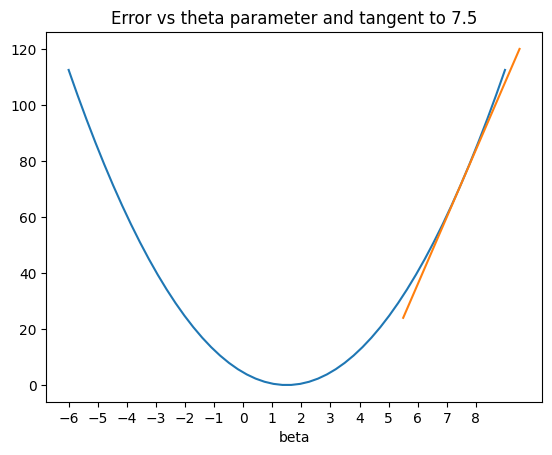

In [19]:
fig = plt.figure()
plt.title("Error vs theta parameter and tangent to 7.5")
plt.xlabel("beta")
plt.plot(x, [SError(v,(2.0,3.0)) for v in x], '-')
x2 = np.linspace(betai-2.0, betai+2.0, 20)
plt.xticks(np.arange(-9, 9, 1.0))
plt.plot(x2, [tangentLine(betai,(2.0,3.0),v) for v in x2], '-')

Observe that the minimun of the Error function is obtained for $\beta=3/2$, so in this case:

In [20]:
point=(2.0,3.0)
print( "Error : ",SError(3.0/2.0, point) , " gradient : ", gradient(3.0/2.0,point))

Error :  0.0  gradient :  0.0


### Update rule implementation 

Assume we update $\beta^1$ with the update rule of the gradient descend algorithm:
 $$ \beta^1(t+1) = \beta^1(t) - \alpha \frac{\partial  Error(\beta^1,(x_0,y_0) )}{\partial \beta^1}  $$
with $\alpha=0.18$ and starting value $\beta^1(0) =5.0$ 

In [9]:
# Oscillating case:  
# betai=5.0
# alpha=0.5

In [21]:
def updateBetaAndPlot(betai,alpha,point):
    fig = plt.figure()
    x = np.linspace(-4, 7, 50)
    plt.title("Error vs beta parameter and tangent to "+str(betai))
    plt.xlabel("beta")
    plt.xticks(np.arange(-4, 7, 1.0))
    plt.plot(x, [SError(v,point) for v in x], '-')
    x2 = np.linspace(betai-2.0, betai+2.0, 20)
    plt.plot(x2, [tangentLine(betai,point,v) for v in x2], '-')
    newbetai=betai - alpha*gradient(betai,point)
    print ( "Next beta: ", newbetai, " , Next Gradient: ", gradient(newbetai,point) )
    return newbetai


## Initial value: $\beta^1(0) =5.0$

Next beta:  2.48  , Next Gradient:  3.92


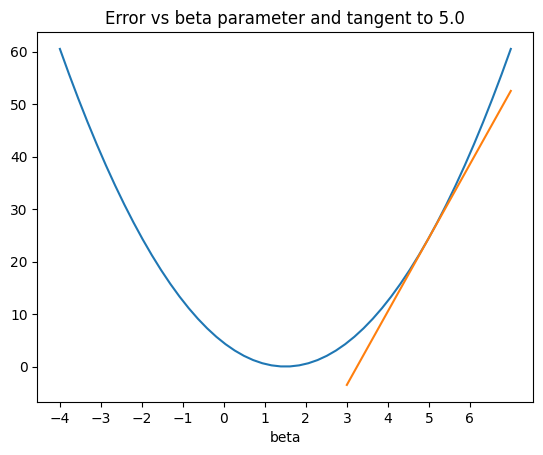

In [22]:
beta=5.0
alpha=0.18
#alpha = 0.25
#alpha = 0.5  # Try this one, it will oscillate between -2.0 and 5.0 forever...
beta = updateBetaAndPlot(beta,alpha,point)

### First update: $\beta_1(1)= \beta_1(0) -gradient(\beta_1(0)) $

Next beta:  1.7744  , Next Gradient:  1.0976


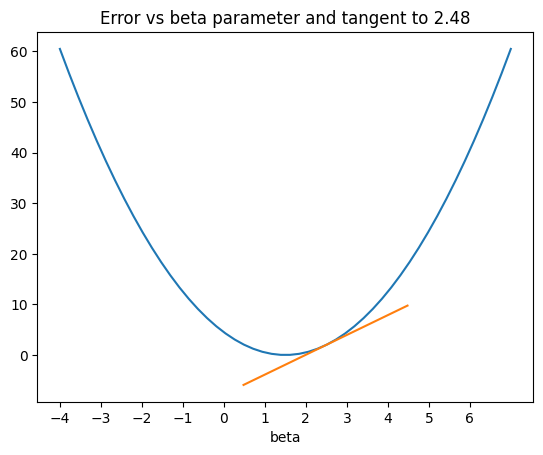

In [12]:
beta = updateBetaAndPlot(beta,alpha,point)

### Second update: $\beta_1(2)= \beta_1(1) -gradient(\beta_1(1)) $

Next beta:  1.576832  , Next Gradient:  0.30732800000000005


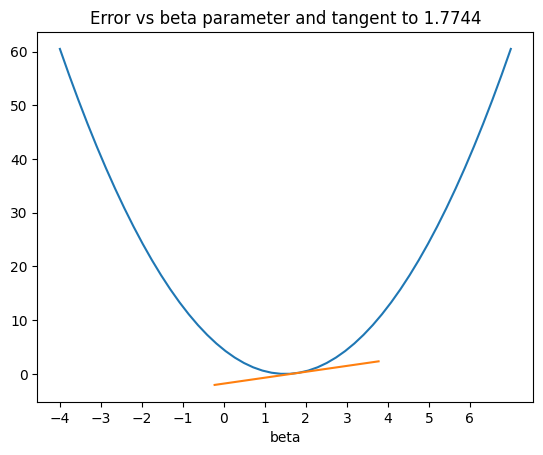

In [13]:
beta = updateBetaAndPlot(beta,alpha,point)

### Third update: $\beta_1(3)= \beta_1(2) -gradient(\beta_1(2)) $

Next beta:  1.52151296  , Next Gradient:  0.08605183999999966


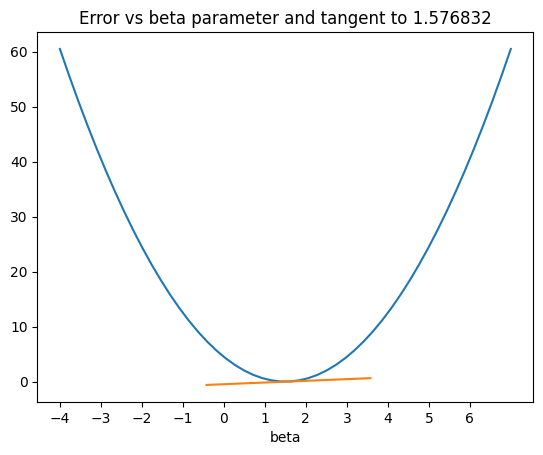

In [14]:
beta = updateBetaAndPlot(beta,alpha,point)

### Fourth update: $\beta_1(4)= \beta_1(3) -gradient(\beta_1(3)) $

Next beta:  1.5060236288  , Next Gradient:  0.024094515199999833


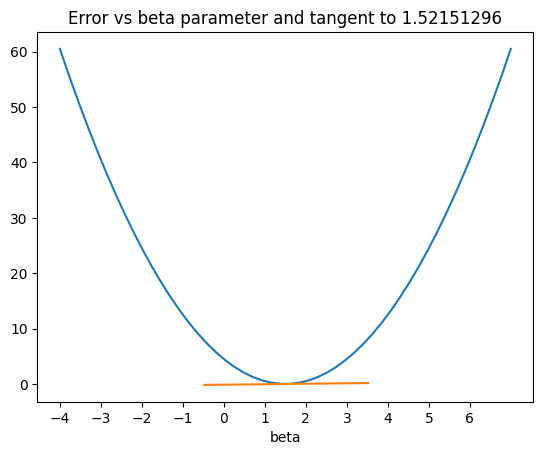

In [15]:
beta = updateBetaAndPlot(beta,alpha,point)

### Fifth update: $\beta_1(5)= \beta_1(4) -gradient(\beta_1(4)) $

Next beta:  1.501686616064  , Next Gradient:  0.0067464642559995625


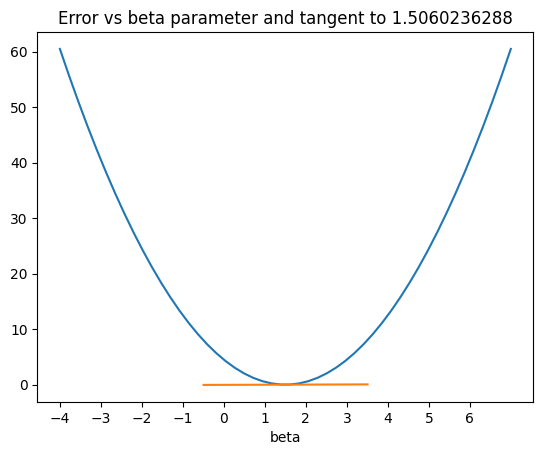

In [16]:
beta = updateBetaAndPlot(beta,alpha,point)

## Stochastic Gradient Descend

So far, we have described the classical Gradient Descend (GD) algorithm, but in the Stochastic variant (SGD), we do not use ALL the sample points at every iteration to compute the gradient (derivative of the error function).

Instead, we use only a small subset of the whole set of $m$ points. Obviously, the gradient computed in this way can be quite different from the one obtained by using all the data points, but usually after enough iterations one may converge to a solution of very good quality and spending much less computation time, because we only use a small subset of points at every iteration. So, the SGD algorithm has one more parameter, the size of the sample subset to use at every iteration to compute the gradient. This sample subset is selected uniformly at random from the whole set of $m$ points.

## SGD Algorithm

This is a high level version of SGD, good for any ML model where you can compute the gradient vector of the Error function for the current model:

```python
def computeSGD(points,maxiters,n,alpha,samplesubset):
  iter = 1
  beta = randomvector(n)
  while (iter <= maxiters and not(Error small enough)):
     gvector = computeGradientVector( points, beta, samplesubset ) 
     beta = beta - ( alpha * gvector )
     iter = iter + 1
```

where: $$ gvector = [\frac{\partial  Error(\beta,sample)}{\partial \beta^1}, \ldots ,  \frac{\partial  Error(\beta,sample)}{\partial \beta^n}] $$

## Parallel implementation of SGD

Suppose we have our data set of $m$ points stored in a RDD in spark. Can you design a high-level algorithm that performs a single iteration of the SGD algorithm ? Observe that the total error is the SUM of the errors given by all the points, so it should be possible to design an algorithm with a high degree of parallelism. That is, each iteration of the SGD algorithm will perform:
1. A Map operation to compute the contribution of each point to the gradient $n-$dimensional vector:
   
  $$  map( point, beta )->[gradient(beta^j,point) \ \forall j \in [1,n]] $$

2. A reduce operation to sum up all these contributions to build the final gradient vector and then compute the next value of the beta vector:
  
   $$ \sum_{point} [gradient(beta^j,point) \ \forall j \in [1,n]] $$


## SGD for Linear Regression in Spark

We can use SGD in Spark to solve a Linear Regression problem working with the *LinearRegressionWithSGD* object of the mllib module of Spark. 

In [28]:
import pyspark
import os
import math
import random
import sys
import warnings

In [25]:
from pyspark.mllib.regression import LabeledPoint, LinearRegressionWithSGD, LinearRegressionModel

In [26]:
def parsePoint(line):
    strnumbers = line.strip().split(' ')
    if (strnumbers[-1] == '' or strnumbers[-1].startswith(' ')): strnumbers.pop()
    values = [float(x) for x in strnumbers]    
    # print values
    return LabeledPoint(values[0], values[1:])

In [29]:
spark_home = os.environ.get('SPARK_HOME', None)
print (spark_home)
cwd = os.getcwd()
print (cwd)
warnings.filterwarnings('ignore')
sc = pyspark.SparkContext('local[*]')
sc

None
/Users/jordilazo/git/data_mining_103089/linearegression


23/10/03 19:25:32 WARN Utils: Your hostname, Jordis-MacBook-Pro.local resolves to a loopback address: 127.0.0.1; using 172.16.129.20 instead (on interface en0)
23/10/03 19:25:32 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/10/03 19:25:32 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


<SparkContext master=local[*] appName=pyspark-shell>

In [30]:
sc.setLogLevel('OFF')

## Linerar Regression with SGD : Example 1

Let's try to find a linear model for a set of data points (that you have in the file linereg-ex1.dat),  that is the following set of six points:

> 21.0 2.0 3.0  
> 27.5 2.5 4.0  
> 17.0 1.5 2.5  
> 31.5 0.5 6.0  
> 34.0 8.0 2.0  
> 47.0 4.0 7.0 

where the first column is the Y value, and the two other columns are the $[X^1,X^2]$ values. This data set has been generated with this model:

$$ Y= 3*X^1 + 5*X^2 $$

Let's check if gradient descend is able to find a model close to it.

In [35]:
#Load points into plain text file
data = sc.textFile("file:////"+cwd+"/linereg-ex1.dat")

# Convert data to LabeledPoint format
parsedData = data.map(parsePoint)

print ("Original data: ")
for line in data.collect():
     print( line )
    
print ("\ntransformed to Labeled Point format "    )
for lpoint in parsedData.collect():
    print ( lpoint )

Original data: 
21.0 2.0 3.0
27.5 2.5 4.0
17.0 1.5 2.5
31.5 0.5 6.0
34.0 8.0 2.0
47.0 4.0 7.0

transformed to Labeled Point format 
(21.0,[2.0,3.0])
(27.5,[2.5,4.0])
(17.0,[1.5,2.5])
(31.5,[0.5,6.0])
(34.0,[8.0,2.0])
(47.0,[4.0,7.0])


In [36]:
# Build the model
model = LinearRegressionWithSGD.train(parsedData, iterations=6, step=0.1)

print ("Model for data in linereg-ex1.dat : ", model)

valuesAndPreds = parsedData.map(lambda p: (p.label, model.predict(p.features)))
print ("\nActual values and predicted values for each point : ")
for yandPred in valuesAndPreds.collect():
  print (yandPred)

# Sum individual errors (with reduce) and divide by number of points to get MSE
MSE = valuesAndPreds.map(lambda valAndPred: 0.5*(valAndPred[0] - valAndPred[1])**2).reduce(lambda x, y: x + y) / valuesAndPreds.count()
print("\nMean Squared Error = " + str(MSE))

Model for data in linereg-ex1.dat :  (weights=[2.8990527017474124,4.817021899658596], intercept=0.0)

Actual values and predicted values for each point : 
(21.0, 20.249171102470612)
(27.5, 26.515719353002915)
(17.0, 16.39113380176761)
(31.5, 30.351657748825282)
(34.0, 32.82646541329649)
(47.0, 45.31536410459982)

Mean Squared Error = 0.6197618270717765


## Second Example : working with more data points

Let's now try the SGD algorithm when working with more data points, this time obtained from the linear model:

$$ Y= 2*X^1 + 3*X^2 + 4*X^3 $$

but we are going to check different sets of data points (all coming from the same above model) increasing the number of data points from one set to the next one. In particular, we are going to try sets with 150, 350, 450, 550 and 650 data points.

In [25]:
import glob

cwdir = os.getcwd()+"/"

print (cwdir)
# Get the list of all data set files starting with the prefix linereg-exk
benchfiles = []
for content in glob.glob("linereg-exk3err0-m*dat"): # "." means current directory
    benchfiles.append(content)
    
benchfiles.sort()
print (benchfiles)

/home/ramon/teaching/shared/teachingBDataMining/sessions/LinearRegression/
['linereg-exk3err0-m150.dat', 'linereg-exk3err0-m350.dat', 'linereg-exk3err0-m450.dat', 'linereg-exk3err0-m550.dat', 'linereg-exk3err0-m650.dat']


In [26]:
# Next, create RDDs for all of them
benchRDDs = []
for f in benchfiles:    
    print (f)
    benchRDDs.append( sc.textFile("file:////"+cwdir+f).map(parsePoint) )

# check the first 4 points of the first data file:
print    (benchRDDs[0].collect()[0:3] )

linereg-exk3err0-m150.dat
linereg-exk3err0-m350.dat
linereg-exk3err0-m450.dat
linereg-exk3err0-m550.dat
linereg-exk3err0-m650.dat


[LabeledPoint(-77.9046221664, [52.9493434086,-262.334435344,150.799999262]), LabeledPoint(-188.534740837, [-187.178048971,-79.5446078017,106.113795127]), LabeledPoint(-1351.22442219, [191.220511971,-278.22044235,-224.751029769])]


Next, we are going to find linear models for all these sample files, but trying three different number of iterations for each one (so we will get three models for each file). We will keep the $\alpha$ parameter (step) fixed to $0.0003$ in all the executions. It may seem a very low value, but later you can rerun this code cell with a higher value for  $\alpha$ and check what happens.

In [27]:
models = {}
errs = {}
for iters in [45,55,120]:
  print ( "\nfinding models with iterations =",iters)
  errs[iters] = []  
  models[iters] = []
  for rdd in benchRDDs:            
      model = LinearRegressionWithSGD.train( rdd, iterations=iters, step=0.0003) 
      print ("model:  -> ", model)
      models[iters].append( model )
      valsandpreds = rdd.map(lambda p: (p.label, model.predict(p.features)))      
      errs[iters].append( valsandpreds.map(lambda valAndPred: 0.5*(valAndPred[0] - valAndPred[1])**2).\
                          reduce(lambda x, y: x + y) / valsandpreds.count() )



finding models with iterations = 45


model:  ->  (weights=[-1.533260947080084,0.5309707638919008,12.254728252098374], intercept=0.0)


model:  ->  (weights=[936.7410054298321,-685.4272859839516,1827.615220779021], intercept=0.0)


model:  ->  (weights=[1148.501373611526,9341.622438722472,4221.748017577995], intercept=0.0)


model:  ->  (weights=[1615.3664858783104,-875.5009213370804,729.221950117696], intercept=0.0)


model:  ->  (weights=[204.40947730131575,52.2358383309076,59.39239959285834], intercept=0.0)



finding models with iterations = 55


model:  ->  (weights=[1.9997874565270162,2.999629524318989,4.000633428099547], intercept=0.0)


model:  ->  (weights=[2.0255585947181762,2.971119408271417,4.058991014529664], intercept=0.0)


model:  ->  (weights=[2.0566652289184875,3.4615548406316754,4.20845860064308], intercept=0.0)


model:  ->  (weights=[2.0640467386895294,2.9654187039358066,4.024891670684826], intercept=0.0)


model:  ->  (weights=[2.002227143637337,3.0005289494731446,4.000583094228076], intercept=0.0)



finding models with iterations = 120


model:  ->  (weights=[1.9997874565270162,2.999629524318989,4.000633428099547], intercept=0.0)


model:  ->  (weights=[2.000131654082927,2.9998348013645444,4.000318781567515], intercept=0.0)


model:  ->  (weights=[1.9999033165301785,2.999212484911936,3.999644323322939], intercept=0.0)


model:  ->  (weights=[2.0003781686908706,2.9997960643773354,4.000143620539939], intercept=0.0)


model:  ->  (weights=[1.9994358757143489,2.9998661292718367,3.9998525310252067], intercept=0.0)


In [28]:
# Show MSE of models
for iters in [45,55,120]:
    print ("Results for iterations=",iters)
    for it,MSE in enumerate(errs[iters]):         
       print (" - Error for : ",benchfiles[it], " : ",MSE)

Results for iterations= 45
 - Error for :  linereg-exk3err0-m150.dat  :  1328311.4709688812
 - Error for :  linereg-exk3err0-m350.dat  :  75040417157.084
 - Error for :  linereg-exk3err0-m450.dat  :  1726827091763.5044
 - Error for :  linereg-exk3err0-m550.dat  :  62950045622.2055
 - Error for :  linereg-exk3err0-m650.dat  :  726238959.8563247
Results for iterations= 55
 - Error for :  linereg-exk3err0-m150.dat  :  0.008972424102796254
 - Error for :  linereg-exk3err0-m350.dat  :  79.8179197842877
 - Error for :  linereg-exk3err0-m450.dat  :  4218.222089444566
 - Error for :  linereg-exk3err0-m550.dat  :  95.50956910705672
 - Error for :  linereg-exk3err0-m650.dat  :  0.08721978201861823
Results for iterations= 120
 - Error for :  linereg-exk3err0-m150.dat  :  0.008972424102796254
 - Error for :  linereg-exk3err0-m350.dat  :  0.002350181581948955
 - Error for :  linereg-exk3err0-m450.dat  :  0.01228006278554445
 - Error for :  linereg-exk3err0-m550.dat  :  0.0033124679357402985
 - Erro

As you can see, with 45 iterations we get linear models with a hight MSE, but increasing a little bit the number of iterations the MSE improves substantially.
Try next to execute the previous code cell but increasing a little bit the $\alpha$ parameter, to check if you are able to get better models with the same number of iterations.

## Finding a model for noisy data

In the previous example, the data points follow an exact linear model, that SGD was able to find. We are now going to test our algorithm for the case where the data comes from a model that is the combination of a linear model plus some random noise added to the final value. That is:

$$ Y= 2*X_1 + 3*X_2 + 4*X_3 +  \epsilon(-2,2) $$

where $\epsilon(-2,2) $ denotes a random uniform variable in the range $ [-2,2] $. This time, SGD may have difficulties to find a model with similar errors than before. A possible way to obtain good models is to generalize a little bit our linear model to this one:

$$ \hat{y_i} = \beta^0 + \sum_{j=1}^{n} \beta^j x_{i,j} $$

where $\beta_0$ represents a constant value added to the linear model, also called the intercept parameter. We can ask spark to look for a linear model with an intercept parameter by setting the optional parameter *intercept* to True when calling the train function. But observe that if the algorithm is not able to find a good value for this additional parameter, we could end up with worse models than the ones we get without the intercept parameter.

In [29]:
# Get the list of all data set files starting with the prefix linereg-exk
nbenchfiles = []
for content in glob.glob("linereg-exk3-m*dat"): # "." means current directory
    nbenchfiles.append(content)

nbenchfiles.sort()
print (nbenchfiles)


['linereg-exk3-m010.dat', 'linereg-exk3-m050.dat', 'linereg-exk3-m150.dat', 'linereg-exk3-m1600.dat', 'linereg-exk3-m200.dat', 'linereg-exk3-m250.dat', 'linereg-exk3-m300.dat', 'linereg-exk3-m350.dat', 'linereg-exk3-m3600.dat', 'linereg-exk3-m400.dat', 'linereg-exk3-m450.dat', 'linereg-exk3-m500.dat', 'linereg-exk3-m550.dat', 'linereg-exk3-m600.dat', 'linereg-exk3-m650.dat']


In [30]:
# Next, create RDDs for all of them
nbenchRDDs = []
for f in nbenchfiles:    
    nbenchRDDs.append( sc.textFile("file:////"+cwdir+f).map(parsePoint) )
    

In [31]:
#
# Next, find linear models for our noisy data sets with SGD

nmodels = {}
nerrs = {}
for iters in [40,50,120]:
  print ("Finding models for iterations=",iters)
  nerrs[iters] = []  
  nmodels[iters] = []
  for rdd in nbenchRDDs:
      model = LinearRegressionWithSGD.train( rdd, iterations=iters, step=0.00022, intercept=False) 
      nmodels[iters].append( model )
      valsandpreds = rdd.map(lambda p: (p.label, model.predict(p.features)))
      nerrs[iters].append( valsandpreds.map(lambda valAndPred: 0.5*(valAndPred[0] - valAndPred[1])**2).\
                                         reduce(lambda x, y: x + y) / valsandpreds.count() )
    
# Next, execute again this cell but with the parameter: intercept=True in the function train    

Finding models for iterations= 40


Finding models for iterations= 50


Finding models for iterations= 120


In [32]:
# Show MSE of models
for iters in [40,50,120]:
    print ("Worst case result for iterations=",iters)
    maxerror = -1.0
    for it,MSE in enumerate(nerrs[iters]):         
     if (MSE > maxerror):
        wit = it
        maxerror = MSE
    print (" - Error for : ",nbenchfiles[wit], " : ",maxerror)
    

Worst case result for iterations= 40
 - Error for :  linereg-exk3-m010.dat  :  1300694339649228.2
Worst case result for iterations= 50
 - Error for :  linereg-exk3-m010.dat  :  169654734.0250614
Worst case result for iterations= 120
 - Error for :  linereg-exk3-m150.dat  :  0.1805005773697179


So, this time we are not able to find models as good as before for our noisy data sets. You can try to rerun the previus code cell with intercept=True or with a different value for $\alpha$, but you will see that it seems not possible to get models with smaller error.

## Linear Regression with Google GDELT data

Next, we are going to try to learn a linear model for predicting one the variables in google GDELT data set (https://www.gdeltproject.org/) from some other variables in the data set. In particular we want to predict the value of the variable **NumMentions**, from the value of the variables: GoldsteinScale, NumSources, NumArticles and AvgTone. Check the document:

http://data.gdeltproject.org/documentation/GDELT-Data_Format_Codebook.pdf

If you want to know about the meaning of these variables for each event recorded in the GDELT data set.

In [37]:
#
# This function assumes that the column to predict is the first one in 
# the set of columns ColumnFilter
#
def mapGDELTRecordsToLPoint( gdeltlines, ColumnFilter ):
    for line in gdeltlines:
        fields = line.split("\t")
        values = [float(  fields[x] ) for x in ColumnFilter]
        # yield LabeledPoint
        yield LabeledPoint( values[0], values[1:] )
    

In [41]:
hlinefile = open( "CSV.header.historical.txt" )
GDELT10headerline = hlinefile.readline().rstrip().split("\t")
hlinefile.close()
print (GDELT10headerline)

# print GDELT10headerline.index( 'EventCode' )

# Get the column index for the different disered attributes
ColumnFilter = [ GDELT10headerline.index( 'NumMentions' ),
                 GDELT10headerline.index( 'GoldsteinScale' ),
                 GDELT10headerline.index( 'NumSources' ),
                 GDELT10headerline.index( 'NumArticles' ),
                 GDELT10headerline.index( 'AvgTone' ) ]

print (ColumnFilter)
                 

['GLOBALEVENTID', 'SQLDATE', 'MonthYear', 'Year', 'FractionDate', 'Actor1Code', 'Actor1Name', 'Actor1CountryCode', 'Actor1KnownGroupCode', 'Actor1EthnicCode', 'Actor1Religion1Code', 'Actor1Religion2Code', 'Actor1Type1Code', 'Actor1Type2Code', 'Actor1Type3Code', 'Actor2Code', 'Actor2Name', 'Actor2CountryCode', 'Actor2KnownGroupCode', 'Actor2EthnicCode', 'Actor2Religion1Code', 'Actor2Religion2Code', 'Actor2Type1Code', 'Actor2Type2Code', 'Actor2Type3Code', 'IsRootEvent', 'EventCode', 'EventBaseCode', 'EventRootCode', 'QuadClass', 'GoldsteinScale', 'NumMentions', 'NumSources', 'NumArticles', 'AvgTone', 'Actor1Geo_Type', 'Actor1Geo_FullName', 'Actor1Geo_CountryCode', 'Actor1Geo_ADM1Code', 'Actor1Geo_Lat', 'Actor1Geo_Long', 'Actor1Geo_FeatureID', 'Actor2Geo_Type', 'Actor2Geo_FullName', 'Actor2Geo_CountryCode', 'Actor2Geo_ADM1Code', 'Actor2Geo_Lat', 'Actor2Geo_Long', 'Actor2Geo_FeatureID', 'ActionGeo_Type', 'ActionGeo_FullName', 'ActionGeo_CountryCode', 'ActionGeo_ADM1Code', 'ActionGeo_Lat', 

In [44]:
rddGDELT1979Points =  sc.textFile( "1979.csv" ).\
                    mapPartitions( lambda seq : mapGDELTRecordsToLPoint( seq, ColumnFilter ) )

print (rddGDELT1979Points.take(3))
print (rddGDELT1979Points.count())


[LabeledPoint(9.0, [1.0,1.0,9.0,5.52631578947368]), LabeledPoint(10.0, [4.0,1.0,10.0,10.9792284866469]), LabeledPoint(10.0, [-5.0,1.0,10.0,10.9792284866469])]
430941


----------------------------------------
Exception occurred during processing of request from ('127.0.0.1', 54240)
Traceback (most recent call last):
  File "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/socketserver.py", line 316, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/socketserver.py", line 347, in process_request
    self.finish_request(request, client_address)
  File "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/socketserver.py", line 360, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/socketserver.py", line 747, in __init__
    self.handle()
  File "/Users/jordilazo/Library/Python/3.9/lib/pytho

This time, we will modify the parameter miniBatchFraction of the SGD algorithm for finding a model in three different executions. We will try the values   $[1.0,0.1,0.001]$ and with the number of iterations equal to 18, to study whether with a reduced number of iterations and sampling less points to compute the gradient really makes any impact in the quality of the model found.

In [36]:
modelgdelt = {}
for bfraction in [1.0,0.1,0.001]:
  modelgdelt[bfraction] = LinearRegressionWithSGD.train( rddGDELT1979Points, iterations=18, step=0.1,
                                            intercept =True, miniBatchFraction=bfraction)

In [37]:
# Print model information with their prediction errors:

valsandpreds = {}
for bfraction in [1.0,0.1,0.001]:
  valsandpreds[bfraction] = rddGDELT1979Points.map(lambda p: (p.label, modelgdelt[bfraction].predict(p.features)))
  MSE = valsandpreds[bfraction].map(lambda valAndPred: 0.5*(valAndPred[0] - valAndPred[1])**2).\
                          reduce(lambda x, y: x + y) /valsandpreds[bfraction].count() 
  print (" - Mean SError for GDELT model with ",bfraction ,  "(",modelgdelt[bfraction], "): ",MSE)


 - Mean SError for GDELT model with  1.0 ( (weights=[-0.07028931274117212,-0.09228480379222315,0.7799164332323584,-0.3123216225732234], intercept=0.9061559374618225) ):  3.182538178866474


 - Mean SError for GDELT model with  0.1 ( (weights=[-0.0647755986138282,-0.1097567607252676,0.8423466193752203,-0.35406776227031334], intercept=0.8399625039362537) ):  3.1754295577931426


 - Mean SError for GDELT model with  0.001 ( (weights=[-0.5708108080365284,0.1459246052845259,-1.9749179498158544,1.613929658782821], intercept=1.130664981235266) ):  63.09678740890592
